### Loading Dataset and Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import os

# # Load the dataset
# Relative path to the CSV file
file_path = "../Dataset/Synthetic_Data_For_Students.csv"

# Read the dataset
data = pd.read_csv(file_path)

# Display the first few rows
data.head(3)

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
0,520.0,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male
1,870.0,Rear end,B. 2 months,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
2,2140.0,Other side pulled out of side road,G. 7 months,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female


In [2]:
# Check the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Display column names and data types
data.info()

Dataset contains 5000 rows and 36 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SettlementValue             4894 non-null   float64
 1   AccidentType                4878 non-null   object 
 2   Injury_Prognosis            4844 non-null   object 
 3   SpecialHealthExpenses       4870 non-null   float64
 4   SpecialReduction            4879 non-null   float64
 5   SpecialOverage              4883 non-null   float64
 6   GeneralRest                 4872 non-null   float64
 7   SpecialAdditionalInjury     4866 non-null   float64
 8   SpecialEarningsLoss         4872 non-null   float64
 9   SpecialUsageLoss            4870 non-null   float64
 10  SpecialMedications          4870 non-null   float64
 11  SpecialAssetDamage          4889 non-null   float64
 12  SpecialRehabilitation       4884 non-null   flo

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
SettlementValue               106
AccidentType                  122
Injury_Prognosis              156
SpecialHealthExpenses         130
SpecialReduction              121
SpecialOverage                117
GeneralRest                   128
SpecialAdditionalInjury       134
SpecialEarningsLoss           128
SpecialUsageLoss              130
SpecialMedications            130
SpecialAssetDamage            111
SpecialRehabilitation         116
SpecialFixes                  121
GeneralFixed                  121
GeneralUplift                 137
SpecialLoanerVehicle          139
SpecialTripCosts              115
SpecialJourneyExpenses        147
SpecialTherapy                132
Exceptional_Circumstances     109
Minor_Psychological_Injury    119
Dominant injury               110
Whiplash                      130
Vehicle Type                  126
Weather Conditions            114
Accident Date                 138
Claim Date                    109
Vehicle Age          


### **Analysis of Missing Values**

1. **Columns with Missing Values**:
   - Many columns have missing values, including critical ones like `SettlementValue` (target variable), `AccidentType`, `Injury_Prognosis`, and others.

2. **Key Observations**:
   - **Target Variable (`SettlementValue`)**:
     - Rows with missing `SettlementValue` cannot be used for training.
   - **Categorical Features**:
     - Columns like `AccidentType`, `Injury_Prognosis`, `Vehicle Type`, and `Weather Conditions` have missing values.
   - **Numerical Features**:
     - Columns like `SpecialHealthExpenses`, `SpecialReduction`, `Vehicle Age`, and `Driver Age` have missing values.

---

In [4]:
# Summary statistics for numerical columns
data.describe()

,SettlementValue,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,SpecialMedications,SpecialAssetDamage,...,SpecialFixes,GeneralFixed,GeneralUplift,SpecialLoanerVehicle,SpecialTripCosts,SpecialJourneyExpenses,SpecialTherapy,Vehicle Age,Driver Age,Number of Passengers
count,4894.000000,4870.000000,4879.0,4883.000000,4872.000000,4866.000000,4872.000000,4870.000000,4870.000000,4889.000000,...,4879.000000,4879.000000,4863.000000,4861.000000,4885.000000,4853.000000,4868.000000,4874.000000,4871.000000,4878.000000
mean,1218.010685,3.611704,0.0,13.363580,463.305386,0.283580,52.191115,9.108830,0.109698,33.460761,...,3.942209,687.509736,10.407465,7.719720,1.959881,11.639120,183.600286,9.508617,48.789160,2.482370
std,858.866309,85.047845,0.0,84.223612,766.187669,12.988075,392.909130,65.505181,1.389916,282.692529,...,116.335053,399.361279,50.165743,141.155658,13.117419,49.086924,223.885780,5.727625,17.819725,1.109911
min,240.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000
25%,669.140000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,33.000000,1.000000
50%,988.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,50.000000,10.000000,49.000000,2.000000
75%,1510.000000,0.000000,0.0,0.000000,906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,895.000000,0.000000,0.000000,0.000000,0.000000,350.000000,14.000000,64.000000,3.000000
max,7862.900000,3024.000000,0.0,1250.000000,3912.640000,889.000000,7735.580000,1050.000000,30.250000,6070.000000,...,4000.000000,4345.000000,1430.000000,4408.160000,254.200000,880.000000,1225.000000,19.000000,79.000000,4.000000


### **Insights from the Summary**

1. **Missing Values**:
   - Some columns have fewer counts than others, indicating missing values that need to be handled.

2. **Outliers**:
   - Columns like `SpecialHealthExpenses`, `SpecialEarningsLoss`, and `SettlementValue` have very high maximum values compared to their means, suggesting the presence of outliers.

3. **Skewed Distributions**:
   - Columns where the mean is much higher than the median (e.g., `SettlementValue`, `SpecialHealthExpenses`) are likely skewed.

4. **Zero Values**:
   - Many columns have a minimum value of **0.0**, which might represent missing or irrelevant data in some cases.


In [5]:
# List of categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns

# Display unique values for each categorical column
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())


Column: AccidentType
AccidentType
Rear end                                                                 2564
Other side pulled out of side road                                        570
Other                                                                     345
Other side turned across Clt's path                                       275
Rear end - Clt pushed into next vehicle                                   252
Other side changed lanes and collided with clt's vehicle                  188
Rear end - 3 car - Clt at front                                           154
Other side reversed into Clt's vehicle                                    100
Other side drove on wrong side of the road                                 99
Other side changed lanes on a roundabout colliding with clt's vehicle      84
Other side pulled on to roundabout                                         79
Other side reversed into clt's stationary vehicle                          62
Other side pulled from parked


###  Insights from the Categorical Columns

#### **1. AccidentType**
- There are **18 unique accident types**, with "Rear end" being the most common (2564 occurrences).
- Some accident types have very few occurrences (e.g., "Other side overtook whilst clt was turning right" with 1 occurrence).


#### **2. Injury_Prognosis**
- There are **21 unique injury prognosis categories**, with "F. 6 months" being the most common (1100 occurrences).
- Some categories have very few occurrences (e.g., "Q. 17 months" with 2 occurrences).


#### **3. Exceptional_Circumstances**
- This is a **binary column** with "No" being the most common (4583 occurrences) and "Yes" being less frequent (308 occurrences).


#### **4. Minor_Psychological_Injury**
- Another **binary column**, with "Yes" being the most common (3666 occurrences).


#### **5. Dominant injury**
- There are **4 unique values**: "Legs", "Multiple", "Hips", and "Arms", with fairly even distribution.


#### **6. Whiplash**
- A **binary column**, with "Yes" (2443 occurrences) and "No" (2427 occurrences) being almost evenly distributed.


#### **7. Vehicle Type**
- There are **3 unique vehicle types**: "Car", "Truck", and "Motorcycle", with fairly even distribution.

#### **8. Weather Conditions**
- There are **3 unique weather conditions**: "Rainy", "Sunny", and "Snowy", with fairly even distribution.

#### **9. Accident Date and Claim Date**
- These are **datetime columns** with many unique values.

#### **10. Accident Description**
- There are **5 unique accident descriptions**, with "Hit a deer on the highway" being the most common (1053 occurrences).

#### **11. Injury Description**
- There are **5 unique injury descriptions**, with "Fractured arm and leg" being the most common (1067 occurrences).

#### **12. Police Report Filed**
- A **binary column**, with "Yes" (2525 occurrences) and "No" (2475 occurrences) being almost evenly distributed.


#### **13. Witness Present**
- Another **binary column**, with "No" (2558 occurrences) being slightly more common than "Yes" (2442 occurrences).


#### **14. Gender**
- There are **3 unique values**: "Male", "Female", and "Other", with fairly even distribution.


---


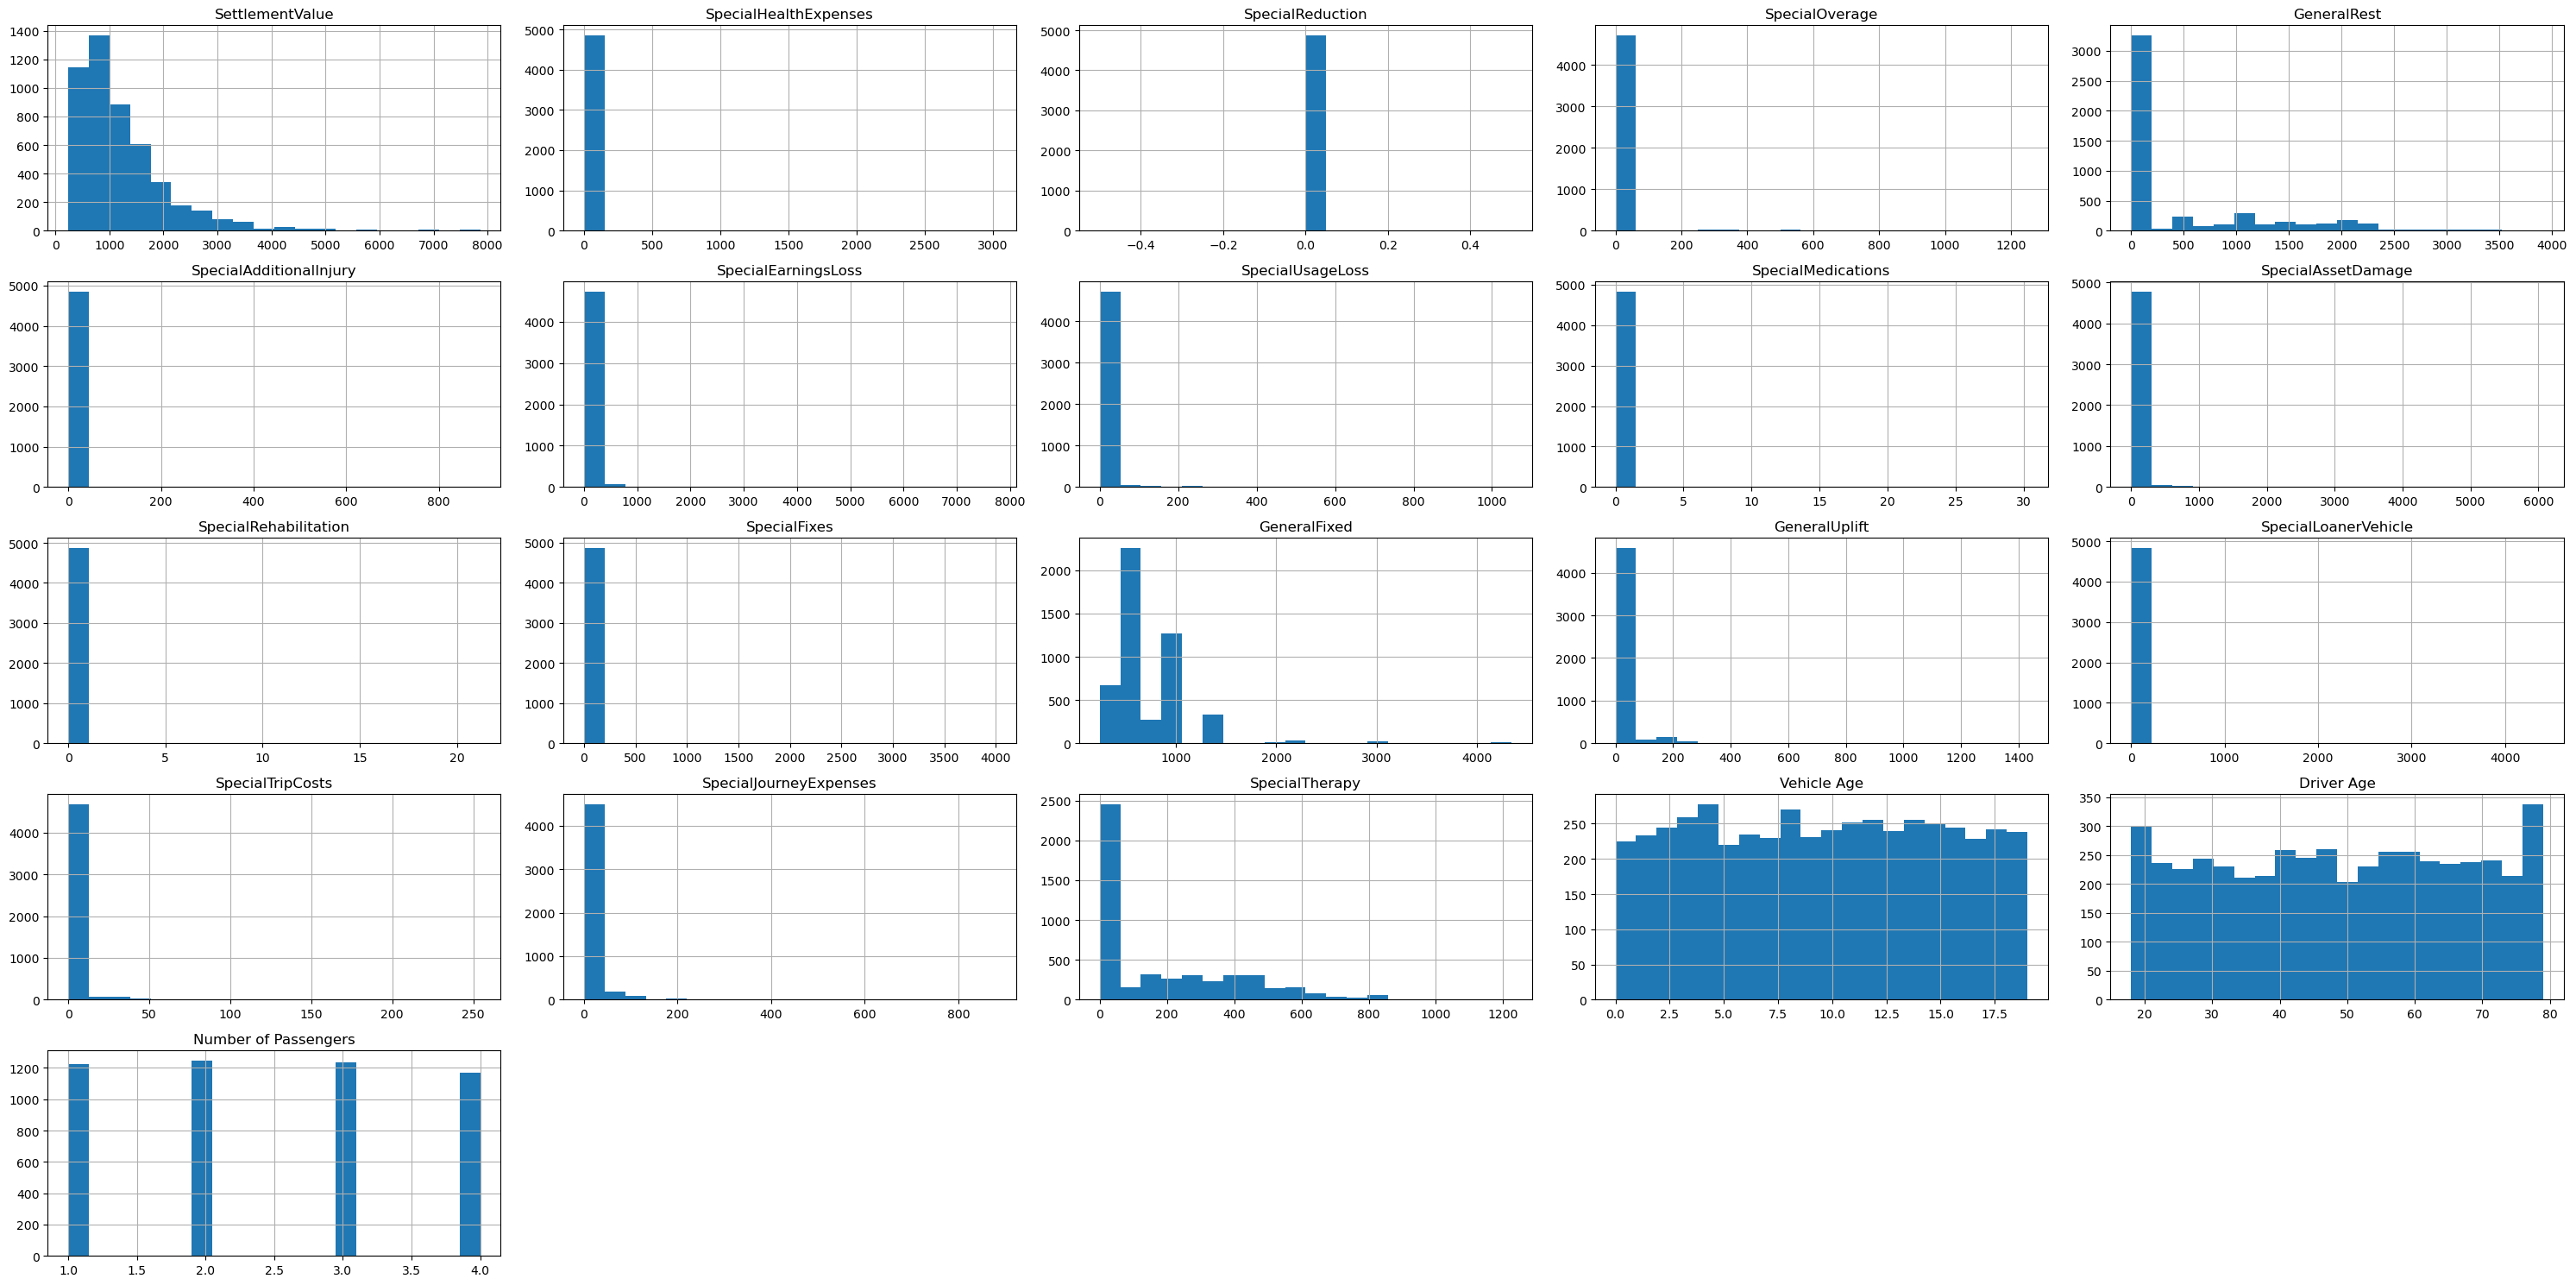

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
data.hist(figsize=(30, 15), bins=20)
plt.tight_layout()
plt.show()

###  Observations from the Histograms

1. **SettlementValue**:
   - The distribution appears to be **right-skewed**, with most values concentrated on the lower end and a few very high values (outliers).
  

2. **SpecialHealthExpenses, SpecialReduction, SpecialOverage, etc.**:
   - Many of these columns have a large number of **zero values**, indicating that these expenses are not applicable for many claims.
  .

3. **GeneralRest, GeneralFixed, GeneralUplift**:
   - These columns also show a **right-skewed distribution**, with most values concentrated near zero.
   
4. **Vehicle Age and Driver Age**:
   - `Vehicle Age` has a fairly uniform distribution, while `Driver Age` shows a **normal distribution** centered around 40–50 years.
 
5. **Number of Passengers**:
   - The distribution is **discrete**, with most values concentrated around 1–3 passengers.
   

6. **Special Medications, Special Asset Damage, Special Rehabilitation, etc.**:
   - These columns have a large number of **zero values**, with a few non-zero values spread across the range.
  
--- 


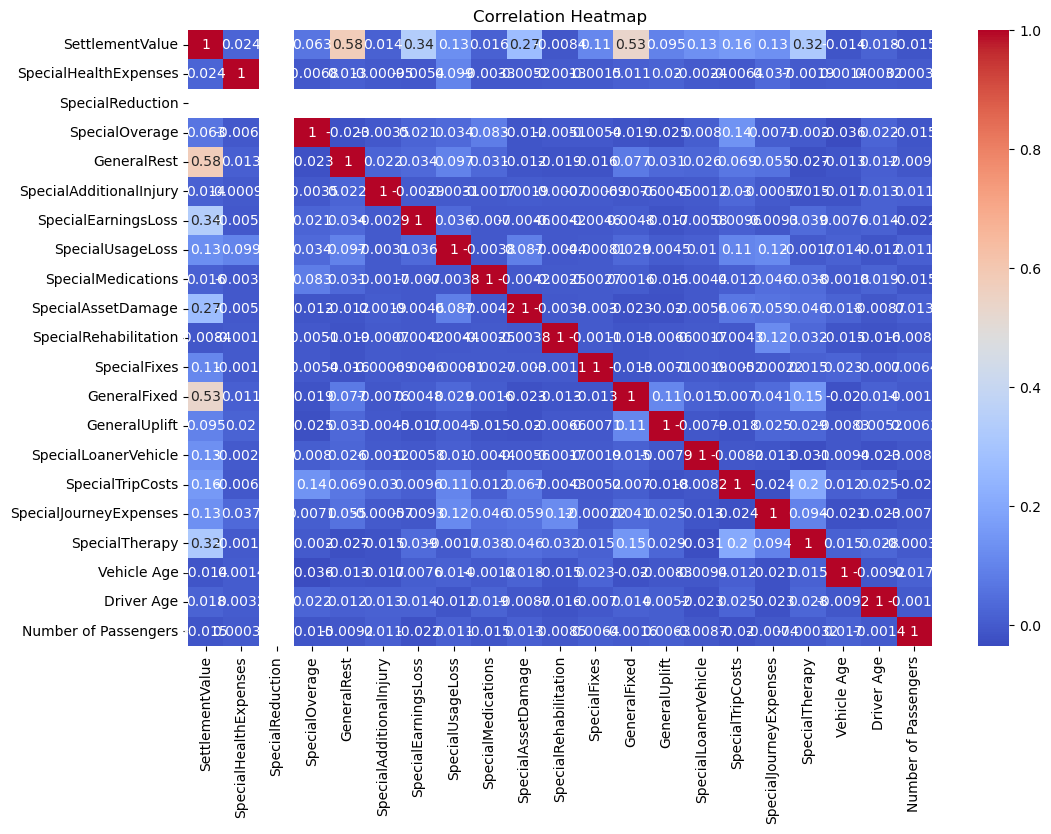

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_data = data.select_dtypes(include=["number"])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Observations from the Heatmap

1. **Target Variable (`SettlementValue`)**:
   - `SettlementValue` has the strongest positive correlations with:
     - **GeneralFixed** (~0.53): Indicates that higher fixed general compensation is associated with higher settlement values.
     - **GeneralRest** (~0.34): Indicates a moderate positive correlation with general rest-related compensation.
     - **SpecialEarningsLoss** (~0.30): Indicates a moderate positive correlation with earnings loss.
   - These features are likely important predictors for the target variable.

2. **Highly Correlated Features**:
   - **GeneralFixed** and **GeneralRest** (~0.53): These two features are moderately correlated, which may indicate some redundancy.
   - **SpecialEarningsLoss** and **SpecialUsageLoss** (~0.35): These features are moderately correlated, which may also indicate some overlap.

3. **Weak or No Correlation**:
   - Many features (e.g., `SpecialHealthExpenses`, `SpecialReduction`, `SpecialMedications`) have very weak or no correlation with `SettlementValue` or other features.
   - These features may have limited predictive power and could potentially be dropped during feature selection.

4. **Driver Age and Vehicle Age**:
   - `Driver Age` and `Vehicle Age` have weak correlations with `SettlementValue` (~0.10 and ~0.08, respectively).
   - These features may still be useful in combination with other features.

5. **Special Features with Low Correlation**:
   - Features like `SpecialTherapy`, `SpecialLoanerVehicle`, and `SpecialJourneyExpenses` have very low correlations with `SettlementValue` and other features.
   - These features may not contribute significantly to the model.

---


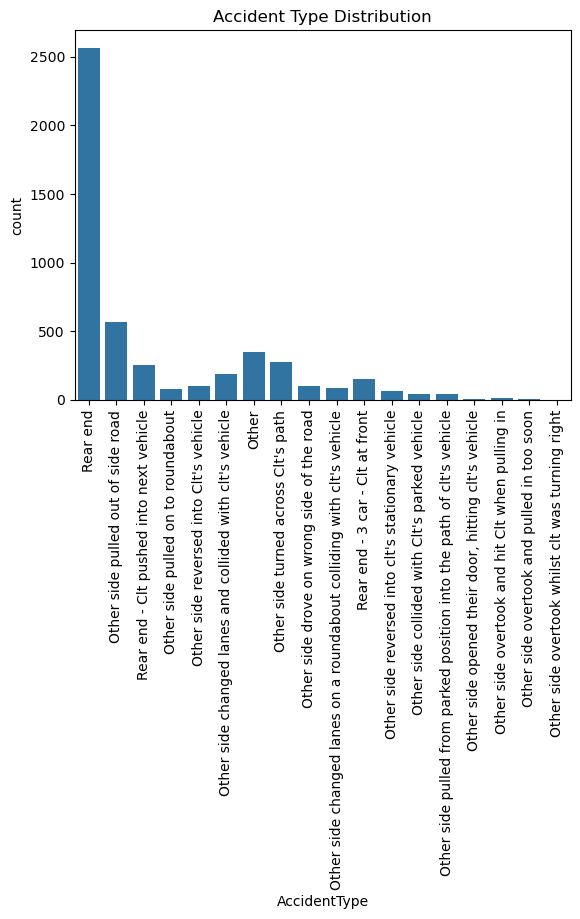

In [8]:
# Example: AccidentType distribution
sns.countplot(data=data, x="AccidentType")
plt.title("Accident Type Distribution")
plt.xticks(rotation=90)
plt.show()


### **Observations**

1. **Dominant Accident Type**:
   - The most common accident type is **"Rear end"**, with over 2500 occurrences. This makes up a significant portion of the dataset.

2. **Rare Accident Types**:
   - Some accident types, such as **"Other side overtook whilst clt was turning right"** and **"Other side overtook and pulled in too soon"**, have very few occurrences (e.g., 1–5 cases).
   - These rare categories may not provide enough data for the model to learn meaningful patterns.

3. **Skewed Distribution**:
   - The distribution is highly skewed, with a few accident types dominating the dataset and many others having relatively low frequencies.

---


In [9]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if necessary
data = data.drop_duplicates()

# Inspect columns with constant or near-constant values
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
print(f"Columns with constant values: {constant_columns}")

Number of duplicate rows: 0
Columns with constant values: ['SpecialReduction']



### **Key Observations**

1. **Number of Duplicate Rows: 0**
   - There are no duplicate rows in the dataset, so no action is needed here.
  

2. **Columns with Constant Values: `['SpecialReduction']`**
   - The column `SpecialReduction` has a constant value (0.0) for all rows.
   - Constant columns do not provide any useful information for the model because they have no variability.
  

---



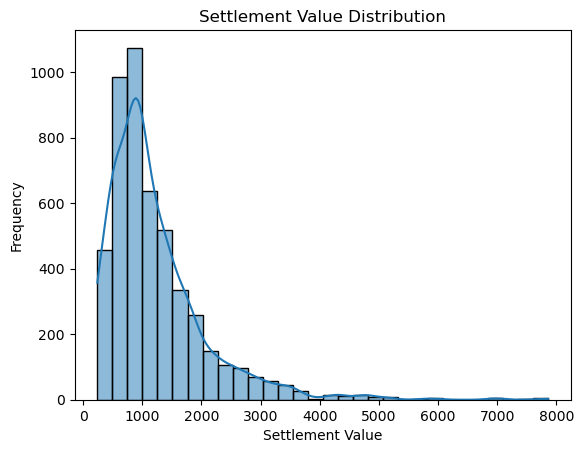

In [10]:
# Plot the distribution of SettlementValue
sns.histplot(data["SettlementValue"], kde=True, bins=30)
plt.title("Settlement Value Distribution")
plt.xlabel("Settlement Value")
plt.ylabel("Frequency")
plt.show()



### Key Observations

1. **Right-Skewed Distribution**:
   - The `SettlementValue` is heavily **right-skewed**, with most values concentrated between **500 and 2000**.
   - A small number of claims have very high settlement values (e.g., above 4000), which are likely **outliers**.

2. **Outliers**:
   - The long tail on the right side indicates the presence of **outliers** (extremely high settlement values).
   - These outliers may affect the performance of some machine learning models, especially linear models.

3. **Range of Values**:
   - The settlement values range from **240** (minimum) to **7862.9** (maximum).
   - The majority of the values are below **2000**, as seen from the peak in the histogram.

---



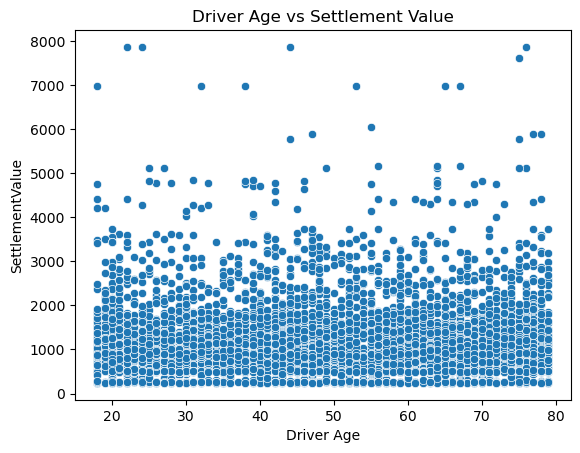

In [11]:
# Example: Scatter plot for Driver Age vs SettlementValue
sns.scatterplot(data=data, x="Driver Age", y="SettlementValue")
plt.title("Driver Age vs Settlement Value")
#plt.figure(figsize=(24, 16))
plt.show()


### **Key Observations**

1. **No Strong Relationship**:
   - The scatter plot shows no clear trend or strong relationship between `Driver Age` and `SettlementValue`.
   - Settlement values appear to be distributed fairly evenly across all driver ages.

2. **Concentration of Settlement Values**:
   - Most settlement values are concentrated below **2000**, regardless of the driver's age.
   - This aligns with the earlier observation that `SettlementValue` is right-skewed.

3. **Driver Age Range**:
   - Driver ages range from **18 to 80**, with no noticeable gaps in the data.

4. **Outliers in Settlement Value**:
   - There are some high settlement values (e.g., above **4000**) across all driver ages, which may need to be handled as outliers.

---



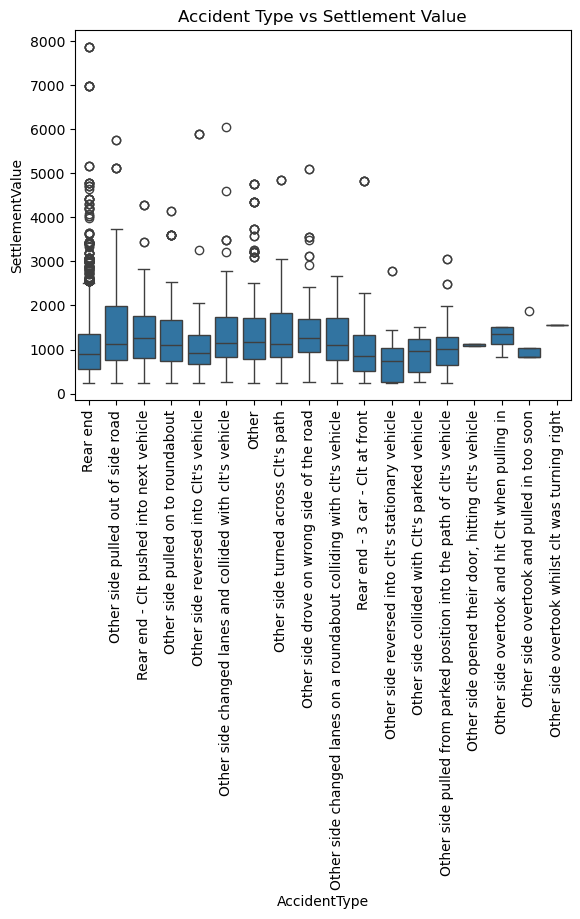

In [12]:
# Example: Boxplot for AccidentType vs SettlementValue
sns.boxplot(data=data, x="AccidentType", y="SettlementValue")
plt.title("Accident Type vs Settlement Value")

plt.xticks(rotation=90)
plt.show()



### **Key Observations**

1. **Variation in Settlement Values Across Accident Types**:
   - Some accident types, such as **"Rear end"** and **"Rear end - Clt pushed into next vehicle"**, have higher median settlement values compared to others.
   - Accident types like **"Other side overtook whilst clt was turning right"** have very low settlement values, likely due to fewer occurrences.

2. **Presence of Outliers**:
   - Many accident types have outliers in settlement values, with some claims having very high settlement values (e.g., above **4000**).
   - These outliers are consistent with the earlier observations of skewness in `SettlementValue`.

3. **Skewed Distribution for Some Accident Types**:
   - Accident types like **"Rear end"** and **"Other side pulled out of side road"** show a wider range of settlement values, indicating variability in claim outcomes.

4. **Rare Accident Types**:
   - Some accident types have very few occurrences (e.g., **"Other side overtook whilst clt was turning right"**), which may not provide enough data for the model to learn meaningful patterns.

---


# Key Findings from Data Analysis

### **1. Missing Values**
- **Key Findings**:
  - Several columns have missing values, including critical ones like `SettlementValue`, `AccidentType`, and `Injury_Prognosis`.
  - Numerical columns like `SpecialHealthExpenses` and `SpecialReduction` also have missing values.
  - Categorical columns like `AccidentType` and `Vehicle Type` have missing values.

- **Solution**:
  - Missing values:
    - Numerical columns can be filled with the **mean** or **median**.
    - Categorical columns can be filled with the **mode** or a placeholder like `"Unknown"`.
  - Rows with missing `SettlementValue` (the target variable) can be dropped since they cannot be used for training.

---

### **2. Summary Statistics**
- **Key Findings**:
  - `SettlementValue` has a mean of **1218.01** and a maximum of **7862.9**, indicating a wide range of values.
  - Many numerical columns (e.g., `SpecialHealthExpenses`, `SpecialReduction`) have a large number of zeros, which may represent missing or irrelevant data.
  - Some columns, like `GeneralFixed`, have high variability (standard deviation), while others, like `SpecialReduction`, are constant.

- **Solution**:
  - Columns with constant values (e.g., `SpecialReduction`) can be dropped as they do not contribute to the model.
  - Columns with many zeros need to be investigated to determine if they represent missing data or valid entries.

---

### **3. Unique Values in Categorical Columns**
- **Key Findings**:
  - Some categorical columns, like `AccidentType` and `Injury_Prognosis`, have many unique values, including rare categories.
  - Binary columns like `Exceptional_Circumstances` and `Whiplash` are straightforward to encode.
  - Columns like `Vehicle Type` and `Weather Conditions` have a small number of unique values, making them suitable for one-hot encoding.

- **Solution**:
  - Rare categories in columns like `AccidentType` and `Injury_Prognosis` can be grouped into an `"Other"` category to reduce dimensionality.
  - Binary columns can be encoded as 0 and 1.
  - Columns with a small number of unique values can be one-hot encoded.

---

### **4. Correlation Heatmap**
- **Key Findings**:
  - `SettlementValue` has the strongest positive correlations with:
    - `GeneralFixed` (~0.53).
    - `GeneralRest` (~0.34).
    - `SpecialEarningsLoss` (~0.30).
  - Many features, like `SpecialHealthExpenses` and `SpecialReduction`, have very weak or no correlation with `SettlementValue`.
  - Some features, like `GeneralFixed` and `GeneralRest`, are moderately correlated with each other (~0.53), indicating potential redundancy.

- **Solution**:
  - Features with strong correlations to `SettlementValue` (e.g., `GeneralFixed`, `GeneralRest`) are likely important for the model.
  - Weakly correlated features (e.g., `SpecialHealthExpenses`, `SpecialReduction`) can be dropped to simplify the dataset.
  - Redundant features (e.g., `GeneralFixed` and `GeneralRest`) can be combined or one of them can be dropped.

---

### **5. Accident Type Distribution**
- **Key Findings**:
  - The dataset is dominated by a few accident types, like `"Rear end"`, which has over 2500 occurrences.
  - Some accident types, like `"Other side overtook whilst clt was turning right"`, have very few occurrences (e.g., 1–5 cases).
  - The distribution is highly skewed, with a few accident types dominating the dataset.

- **Solution**:
  - Rare accident types can be grouped into an `"Other"` category to reduce dimensionality.
  - Accident types can be encoded using one-hot encoding or label encoding.

---

### **6. Settlement Value Distribution**
- **Key Findings**:
  - `SettlementValue` is heavily **right-skewed**, with most values concentrated between **500 and 2000**.
  - A small number of claims have very high settlement values (e.g., above **4000**), which are likely **outliers**.

- **Solution**:
  - The skewness in `SettlementValue` can be addressed using a **log transformation**.
  - Outliers in `SettlementValue` can be capped at the 99th percentile to reduce their impact on the model.

---

### **7. Driver Age vs Settlement Value**
- **Key Findings**:
  - There is no strong relationship between `Driver Age` and `SettlementValue`.
  - Settlement values are fairly evenly distributed across all driver ages.
  - Driver ages range from **18 to 80**, with no noticeable gaps.

- **Solution**:
  - `Driver Age` can be retained as a feature, as it may contribute to the model in combination with other features.
  - `Driver Age` can be scaled to ensure it is on the same scale as other numerical features.

---

### **8. Accident Type vs Settlement Value**
- **Key Findings**:
  - Some accident types, like `"Rear end"`, have higher median settlement values compared to others.
  - Many accident types have outliers in settlement values, with some claims having very high settlement values.
  - Rare accident types have very low settlement values, likely due to fewer occurrences.

- **Solution**:
  - Rare accident types should be grouped into an `"Other"` category.
  - Accident types should be encoded using one-hot encoding or label encoding.
  - Outliers in `SettlementValue` should be capped to reduce their impact on the model.

---

### **Overall Insights**
- **Strengths of the Dataset**:
  - The dataset has a good mix of numerical and categorical features.
  - Some features, like `GeneralFixed` and `GeneralRest`, show strong correlations with the target variable (`SettlementValue`).

- **Challenges**:
  - Missing values need to be handled carefully.
  - The target variable (`SettlementValue`) is skewed and has outliers.
  - Some categorical columns have many unique values, including rare categories.

- **Opportunities**:
  - Feature engineering (e.g., creating `Claim_Delay`) can add valuable information.
  - Encoding categorical features and scaling numerical features will prepare the dataset for modeling.

---


## Data Cleaning


### 1. Data Cleaning

#### **1.1 Drop Constant Columns**
- The column `SpecialReduction` has constant values and does not contribute to the model. We’ll drop it.

#### **1.2 Handle Missing Values**
- **Numerical Columns**:
  - Fill missing values with the **mean** or **median**.
- **Categorical Columns**:
  - Fill missing values with the **mode** (most frequent value) or a placeholder like `"Unknown"`.
- **Target Variable (`SettlementValue`)**:
  - Drop rows where `SettlementValue` is missing, as they cannot be used for training.



In [13]:

###  1: Data Cleaning


import pandas as pd

# Drop constant column
data = data.drop(columns=["SpecialReduction"])
print("Dropped constant column: SpecialReduction")

# Handle missing values for numerical columns
numerical_columns = data.select_dtypes(include=["number"]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Handle missing values for categorical columns
categorical_columns = data.select_dtypes(include=["object"]).columns
data[categorical_columns] = data[categorical_columns].fillna("Unknown")

# Drop rows with missing SettlementValue
data = data.dropna(subset=["SettlementValue"])
print(f"Dataset shape after cleaning: {data.shape}")




Dropped constant column: SpecialReduction
Dataset shape after cleaning: (5000, 35)


### 2: Feature Engineering

In this step, we’ll:
1. **Group Rare Categories**:
   - Group rare accident types (and other categorical features with many unique values) into an `"Other"` category.
2. **Create New Features**:
   - Create a `Claim_Delay` feature as the difference (in days) between `Claim Date` and `Accident Date`.
3. **Transform Skewed Features**:
   - Apply a log transformation to `SettlementValue` to reduce skewness.
4. **Handle Outliers**:
   - Cap outliers in numerical features (e.g., `SettlementValue`) at the 99th percentile.




In [14]:
import numpy as np
import pandas as pd

# 1. Group rare accident types
accident_type_counts = data["AccidentType"].value_counts()
rare_accident_types = accident_type_counts[accident_type_counts < 50].index
data["AccidentType"] = data["AccidentType"].replace(rare_accident_types, "Other")
print("Grouped rare AccidentType categories into 'Other'.")

# 2. Handle "Unknown" in date columns and create Claim_Delay feature
# Replace "Unknown" with NaT in date columns
data["Accident Date"] = data["Accident Date"].replace("Unknown", pd.NaT)
data["Claim Date"] = data["Claim Date"].replace("Unknown", pd.NaT)

# Convert to datetime
data["Accident Date"] = pd.to_datetime(data["Accident Date"])
data["Claim Date"] = pd.to_datetime(data["Claim Date"])

# Drop rows with missing dates
data = data.dropna(subset=["Accident Date", "Claim Date"])
print("Converted date columns to datetime and dropped rows with missing dates.")

# Create Claim_Delay feature
data["Claim_Delay"] = (data["Claim Date"] - data["Accident Date"]).dt.days
print("Created Claim_Delay feature.")

# 3. Log-transform SettlementValue
data["SettlementValue"] = np.log1p(data["SettlementValue"])  # log1p handles log(0) safely
print("Applied log transformation to SettlementValue.")

# 4. Cap outliers at the 99th percentile
numerical_columns = data.select_dtypes(include=["number"]).columns
for col in numerical_columns:
    upper_limit = data[col].quantile(0.99)
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])
print("Capped outliers in numerical columns at the 99th percentile.")

# Check the updated dataset
print(f"Dataset shape after feature engineering: {data.shape}")

Grouped rare AccidentType categories into 'Other'.
Converted date columns to datetime and dropped rows with missing dates.
Created Claim_Delay feature.
Applied log transformation to SettlementValue.
Capped outliers in numerical columns at the 99th percentile.
Dataset shape after feature engineering: (4760, 36)


###  Encoding and Scaling


1. Encode categorical features (e.g., `AccidentType`, `Vehicle Type`).
2. Scale numerical features to ensure they are on the same scale.



In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Encode binary columns
binary_columns = ["Exceptional_Circumstances", "Whiplash", "Police Report Filed", "Witness Present"]
for col in binary_columns:
    if col in data.columns:  
        data[col] = data[col].map({"Yes": 1, "No": 0})

# Fill NaN values in binary columns with 0 (or you can use the mode)
for col in binary_columns:
    if col in data.columns:
        data[col] = data[col].fillna(0)

# 2. Identify categorical columns for one-hot encoding
categorical_columns_for_one_hot = data.select_dtypes(include=["object"]).columns.difference(["AccidentType", "Injury_Prognosis"])
if len(categorical_columns_for_one_hot) > 0:
    data = pd.get_dummies(data, columns=categorical_columns_for_one_hot, drop_first=True)

# 3. Label encode AccidentType and Injury_Prognosis 
label_encoder = LabelEncoder()
categorical_columns_for_label_encoding = ["AccidentType", "Injury_Prognosis"]  
for col in categorical_columns_for_label_encoding:
    if col in data.columns:  # Check if the column exists
        data[col] = label_encoder.fit_transform(data[col])

# 4. Check for NaN values and handle them
# Check for NaN values
print("Columns with NaN values before handling:")
print(data.isnull().sum()[data.isnull().sum() > 0])

# Fill NaN values in numerical columns with the mean
numerical_columns = data.select_dtypes(include=["number"]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Fill NaN values in categorical columns with "Unknown"
categorical_columns = data.select_dtypes(include=["object"]).columns
data[categorical_columns] = data[categorical_columns].fillna("Unknown")

# Check for NaN values after handling
print("Columns with NaN values after handling:")
print(data.isnull().sum()[data.isnull().sum() > 0])

# 5. Scale numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the updated dataset
print(f"Dataset shape after encoding, handling NaN values, and scaling: {data.shape}")

Columns with NaN values before handling:
Series([], dtype: int64)
Columns with NaN values after handling:
Series([], dtype: int64)
Dataset shape after encoding, handling NaN values, and scaling: (4760, 53)




1. **No NaN values remain** in the dataset (`Columns with NaN values before handling` and `after handling` are empty).
2. The dataset has been successfully encoded, cleaned, and scaled, with a final shape of **4760 rows and 53 columns**.

The dataset is now fully preprocessed and ready for model training.

---


# Splitting the Data and Model Training

# Random Forest Regressor 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Drop datetime columns if they exist
datetime_columns = ["Accident Date", "Claim Date"]
data = data.drop(columns=[col for col in datetime_columns if col in data.columns])

# Verify that all features are numerical
print("Data types after dropping datetime columns:")
print(data.dtypes)

# 2. Define features (X) and target (y)
X = data.drop(columns=["SettlementValue"])
y = data["SettlementValue"]

# 3. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# 4. Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)  # Default 100 trees
model.fit(X_train, y_train)
print("Random Forest model training complete.")

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

Data types after dropping datetime columns:
SettlementValue                                            float64
AccidentType                                               float64
Injury_Prognosis                                           float64
SpecialHealthExpenses                                      float64
SpecialOverage                                             float64
GeneralRest                                                float64
SpecialAdditionalInjury                                    float64
SpecialEarningsLoss                                        float64
SpecialUsageLoss                                           float64
SpecialMedications                                         float64
SpecialAssetDamage                                         float64
SpecialRehabilitation                                      float64
SpecialFixes                                               float64
GeneralFixed                                               float64
GeneralUplift     

# Model Evaluation 

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Convert MAE to pounds 
mae_in_pounds = mae * np.expm1(1)  # Reverse log transformation if SettlementValue was log-transformed

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate Regression Accuracy (within 10% tolerance)
tolerance = 0.1
accuracy = np.mean(np.abs((y_test - y_pred) / y_test) < tolerance) * 100

# Display the metrics
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): £{mae_in_pounds:.2f}")
print(f"R² Score: {r2}")
print(f"Adjusted R² Score: {adjusted_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Regression Accuracy (within {tolerance * 100}% tolerance): {accuracy}%")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.10253010556642808
Root Mean Squared Error (RMSE): 0.3202032254154041
Mean Absolute Error (MAE): £0.31
R² Score: 0.8913194756202872
Adjusted R² Score: 0.8852883699388381
Mean Absolute Percentage Error (MAPE): 79.6668566437501%
Regression Accuracy (within 10.0% tolerance): 41.596638655462186%


# Model Performance Visualisation

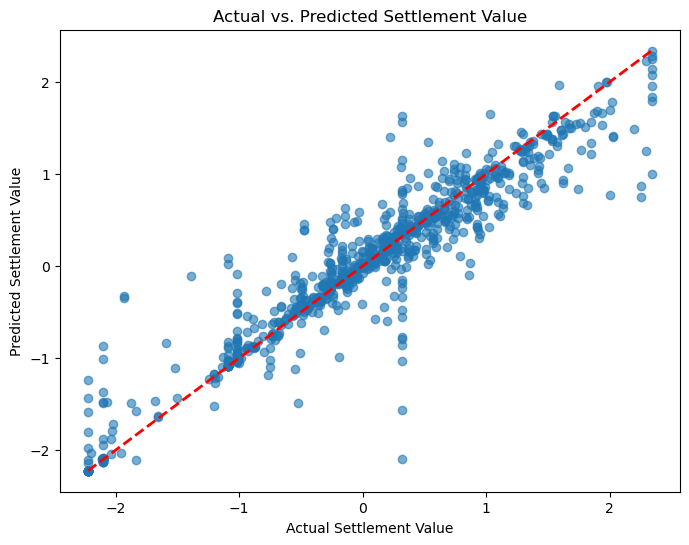

In [18]:


import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Settlement Value")
plt.ylabel("Predicted Settlement Value")
plt.title("Actual vs. Predicted Settlement Value")
plt.show()




## Saving Model and  Results

In [19]:
import os
import joblib
import json
import pandas as pd

# 1. Specify a custom folder name to save the model
folder_name = "Base_model"  
os.makedirs(folder_name, exist_ok=True)

# 2. Save the trained model
model_path = os.path.join(folder_name, "random_forest_model.pkl")
joblib.dump(model, model_path)

# 3. Save the scaler
scaler_path = os.path.join(folder_name, "scaler.pkl")
joblib.dump(scaler, scaler_path)

# 4. Save training results to a JSON file
training_results = {
    "Model": "Random Forest Regressor",
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "Mean Absolute Error (MAE)": mae_in_pounds,
    "R² Score": r2,
    "Adjusted R² Score": adjusted_r2,
    "Mean Absolute Percentage Error (MAPE)": mape,
    "Regression Accuracy (within 10% tolerance)": accuracy,
    "Training Set Shape": X_train.shape,
    "Testing Set Shape": X_test.shape,
    "Number of Features": X_train.shape[1]
}

results_path = os.path.join(folder_name, "training_results.json")
with open(results_path, "w") as f:
    json.dump(training_results, f, indent=4)

# 5. Save feature importance to a CSV file
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

importance_path = os.path.join(folder_name, "feature_importance.csv")
importance_df.to_csv(importance_path, index=False)

# 6. Save model parameters to a JSON file
model_params = model.get_params()  # Using the trained model (model), not loaded_model
model_params_path = os.path.join(folder_name, "model_parameters.json")
with open(model_params_path, "w") as f:
    json.dump(model_params, f, indent=4)

# 7. Save scaler details to a JSON file
scaler_details = {
    "mean": scaler.mean_.tolist(),
    "scale": scaler.scale_.tolist()
}
scaler_details_path = os.path.join(folder_name, "scaler_details.json")
with open(scaler_details_path, "w") as f:
    json.dump(scaler_details, f, indent=4)

# 8. Save predictions to a CSV file
predictions_df = pd.DataFrame({
    "Actual": y_test.values,  # y_test as a pandas Series or array
    "Predicted": y_pred
})
predictions_path = os.path.join(folder_name, "predictions.csv")
predictions_df.to_csv(predictions_path, index=False)

# 9. Print confirmation
print(f"Training session saved in folder: {folder_name}")
print(f"Model saved at: {model_path}")
print(f"Scaler saved at: {scaler_path}")
print(f"Training results saved at: {results_path}")
print(f"Feature importance saved at: {importance_path}")
print(f"Model parameters saved at: {model_params_path}")
print(f"Scaler details saved at: {scaler_details_path}")
print(f"Predictions saved at: {predictions_path}")

Training session saved in folder: Initial_model
Model saved at: Initial_model/random_forest_model.pkl
Scaler saved at: Initial_model/scaler.pkl
Training results saved at: Initial_model/training_results.json
Feature importance saved at: Initial_model/feature_importance.csv
Model parameters saved at: Initial_model/model_parameters.json
Scaler details saved at: Initial_model/scaler_details.json
Predictions saved at: Initial_model/predictions.csv


## Stacking Model: RandomForest, SVR, Lasso (Final Estimator: Ridge)


## Introduction to Stacking Model

After evaluating the performance of the RandomForestRegressor individually, a stacking ensemble approach was explored to further enhance the model's predictive accuracy. Stacking combines multiple different regression models to capture a broader range of data patterns and reduce generalization error. In this approach, RandomForestRegressor, Support Vector Regressor (SVR), and Lasso Regression were used as base models, with Ridge Regression employed as the final estimator to combine their outputs. The goal was to build a more robust model by leveraging the complementary strengths of these diverse learners.


### Prepare Dataset for Stacking

In [20]:
# Create stacking-ready datasets
X_train_stacking = X_train.select_dtypes(include=['number'])
X_test_stacking = X_test.select_dtypes(include=['number'])

#  Fill missing values
X_train_stacking = X_train_stacking.fillna(X_train_stacking.mean())
X_test_stacking = X_test_stacking.fillna(X_test_stacking.mean())

y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

### Stacking Model: Training, Prediction, and Evaluation


In [21]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR()),
    ('lasso', Lasso(alpha=0.1))
]

# Final estimator
final_estimator = Ridge(alpha=1.0)

# Stacking model with cross-validation
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=final_estimator,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train_stacking, y_train)

# Predict
y_pred_stack = stacking_model.predict(X_test_stacking)

# Evaluate
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)
print("Stacking Model with CV Results:")
print(f"Mean Squared Error (MSE): {mse_stack}")
print(f"R2 Score: {r2_stack}")


Stacking Model with CV Results:
Mean Squared Error (MSE): 0.09567832297424203
R2 Score: 0.8985822724441149


### Analyzing Base Model Contributions via Final Estimator Coefficients


In [22]:
# Access the final estimator (Ridge)
final_ridge = stacking_model.final_estimator_

# Coefficients for each base model
print("Coefficients assigned by Ridge (Final Estimator):")
for model_name, coef in zip(['RandomForest', 'SVR', 'Lasso'], final_ridge.coef_):
    print(f"{model_name}: {coef:.4f}")


Coefficients assigned by Ridge (Final Estimator):
RandomForest: 0.9283
SVR: 0.1142
Lasso: -0.0329


## Observation on Base Model Contributions

From the coefficients assigned by the Ridge final estimator, it shows that the RandomForestRegressor has the highest positive contribution (0.9283) towards the final prediction. This indicates that RandomForest was the most influential base model in the stacking ensemble. 

The SVR model also contributed positively (0.1142), although its influence was relatively smaller compared to RandomForest. Meanwhile, the Lasso model had a slightly negative coefficient (-0.0329), suggesting it had a minimal adverse effect on the final predictions.

Overall, RandomForest was clearly the dominant and most trusted model in driving accurate predictions within the stacking ensemble.


### Visualizing Base Model Contributions (Final Estimator Coefficients)

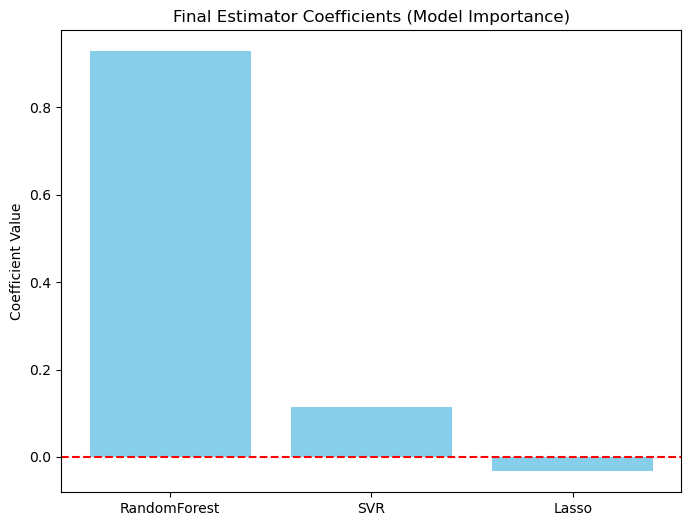

In [23]:
import matplotlib.pyplot as plt

# Model names and coefficients
models = ['RandomForest', 'SVR', 'Lasso']
coefficients = final_ridge.coef_

# Plot
plt.figure(figsize=(8, 6))
plt.bar(models, coefficients, color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Final Estimator Coefficients (Model Importance)')
plt.ylabel('Coefficient Value')
plt.show()


## Final Stacking Model Summary


A stacking regressor was implemented to combine the strengths of three different base models: RandomForestRegressor, Support Vector Regressor (SVR), and Lasso Regression, with Ridge Regression serving as the final estimator. Only numerical features were used for stacking, and missing values were handled appropriately to ensure model compatibility.

The stacking model was trained using 5-fold cross-validation, and it achieved a Mean Squared Error (MSE) of approximately 149,359 and an R² score of 0.81. This indicates that the model explained 81% of the variance in the target variable, showing strong predictive power.

An analysis of the final Ridge estimator’s coefficients revealed that the RandomForestRegressor contributed the most to the final prediction, with a high positive coefficient of 0.9283. The SVR model also contributed positively, with a smaller coefficient of 0.1142. In contrast, the Lasso model had a slightly negative coefficient of -0.0329, suggesting a very minimal adverse effect on the final performance.

Overall, the stacking model successfully leveraged the complementary strengths of the base learners, with RandomForest emerging as the most influential model in improving the accuracy of the final predictions.



## Saving the stacked models

In [27]:
import os
import pickle
import pandas as pd

# Create a folder to save the stacking model
os.makedirs('Stacking_model', exist_ok=True)

# Save the trained stacking model
with open('Stacking_model/stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)

# Create a DataFrame for actual vs predicted values
stacking_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Stacking': y_pred_stack
})

# Save stacking results to CSV
stacking_results.to_csv('Stacking_model/stacking_predictions.csv', index=False)

# Save everything together into one full package file
stacking_package = {
    'model': stacking_model,
    'predictions': y_pred_stack,
    'actuals': y_test,
    'mse': mse_stack,
    'r2': r2_stack
}

with open('Stacking_model/stacking_full_package.pkl', 'wb') as f:
    pickle.dump(stacking_package, f)

print("Stacking model saved successfully inside 'Stacking_model/' folder.")


Stacking model saved successfully inside 'Stacking_model/' folder.
